<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#timeconvert" data-toc-modified-id="timeconvert-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>timeconvert</a></span></li></ul></li><li><span><a href="#xspec" data-toc-modified-id="xspec-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>xspec</a></span></li><li><span><a href="#OX_CLAGN5_nustar" data-toc-modified-id="OX_CLAGN5_nustar-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>OX_CLAGN5_nustar</a></span></li><li><span><a href="#NED" data-toc-modified-id="NED-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NED</a></span><ul class="toc-item"><li><span><a href="#Latex" data-toc-modified-id="Latex-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Latex</a></span></li></ul></li><li><span><a href="#mission-=-'numaster'" data-toc-modified-id="mission-=-'numaster'-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>mission = 'numaster'</a></span><ul class="toc-item"><li><span><a href="#ESO-362-G18" data-toc-modified-id="ESO-362-G18-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ESO 362-G18</a></span></li><li><span><a href="#NGC-2992" data-toc-modified-id="NGC-2992-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>NGC 2992</a></span></li><li><span><a href="#NGC-4151" data-toc-modified-id="NGC-4151-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>NGC 4151</a></span></li><li><span><a href="#NGC-4395" data-toc-modified-id="NGC-4395-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>NGC 4395</a></span></li><li><span><a href="#NGC-7582" data-toc-modified-id="NGC-7582-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>NGC 7582</a></span></li></ul></li><li><span><a href="#NGC-4507" data-toc-modified-id="NGC-4507-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>NGC 4507</a></span><ul class="toc-item"><li><span><a href="#Slab" data-toc-modified-id="Slab-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Slab</a></span></li><li><span><a href="#mytorus-coupled" data-toc-modified-id="mytorus-coupled-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>mytorus coupled</a></span></li><li><span><a href="#mytorus-coupled" data-toc-modified-id="mytorus-coupled-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>mytorus coupled</a></span></li><li><span><a href="#borus02" data-toc-modified-id="borus02-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>borus02</a></span></li><li><span><a href="#XCLUMPY" data-toc-modified-id="XCLUMPY-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>XCLUMPY</a></span></li><li><span><a href="#RXTORUS" data-toc-modified-id="RXTORUS-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>RXTORUS</a></span></li></ul></li><li><span><a href="#turn-off-AGN" data-toc-modified-id="turn-off-AGN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>turn off AGN</a></span><ul class="toc-item"><li><span><a href="#plot-M-time" data-toc-modified-id="plot-M-time-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>plot M time</a></span></li></ul></li></ul></div>

In [3]:
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr#
from scipy import stats 

import matplotlib.pyplot as plt
from pylab import cm
import matplotlib as mpl

from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2


#from adjustText import adjust_text

def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 
    
def plot_secax(ax,mi_interval=365,ma_interval=365*2):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=30,)    

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_36461/1640537932.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [4]:
def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [5]:
import numpy
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

## timeconvert

In [36]:
from astropy.time import Time
from astropy.io import fits
import time
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

# xspec

The flux will be calculated for all loaded spectra. If no spectra are loaded (or none of the loaded spectra have a response), the model is evaluated over the energy range determined by its dummy response. (In XSPEC12, models are automatically assigned default dummy responses when there is no data, so the dummyrsp command need not be given.) 

Q: I want to construct a light curve in a limited energy range but the software needs the PI channel range ('pilow' and 'pihigh'): what is the conversion from PI channel to energy?
A: The channel to energy conversion is linear: E = Channel Number * 0.04 keV + 1.6 keV (lower energy range of bin) Channel 0 corresponds to 1.60-1.64 keV, channel 1 corresponds to 1.64-1.68 keV, etc. You can also check the ebounds extension of RMF files (with the 'fv' command) to confirm the relationship between PI value and energy.

In [ ]:
1-35,507-2725

In [25]:
35*0.04+1.6,507*0.04+1.6,2725*0.04+1.6

(3.0, 21.880000000000003, 110.6)

In [ ]:
ignore **-3.0 60.0-**

Gaussian and Lorentzian smoothing models
These models by Keith Arnaud (kaa@lheamail.gsfc.nasa.gov) convolve the current model with a gaussian or a lorentzian profile. The width of the gaussian or lorentzian can vary with energy in a power-law relation whose index is the second parameter. The first parameter is the width (sigma) at 6 keV in units of keV. The gaussian smooth source code and lmodel.dat entries are available as are the lorentzian smooth source code and lmodel.dat entries. The gaussian smooth model is called g2smooth to distinguish it from the single-parameter gsmooth model included in the v11 distribution.

# OX_CLAGN5_nustar

In [145]:
OX_CLAGN5_nustar=[ 'ESO 362-G18', 'NGC 2992', 'NGC 4151','NGC 7582'] #'NGC 4395'

In [146]:
for i in OX_CLAGN5_nustar:
    sourcename=i.strip().replace(' ','').replace('-','_')
    print(sourcename)    
    
    
    

ESO362_G18
NGC2992
NGC4151
NGC7582


datadir_root='/home/brettlv/'

In [6]:
import astroquery

In [7]:
print(astroquery.__version__)

0.4.6


In [8]:
from astroquery.ipac.ned import Ned

In [9]:
result_table = Ned.query_object(OX_CLAGN5_nustar[0])
print(result_table) # an astropy.table.Table

No.  Object Name       RA     ... Redshift Points Diameter Points Associations
                    degrees   ...                                             
--- -------------- ---------- ... --------------- --------------- ------------
  1 ESO 362- G 018   79.89916 ...              31              23            1


In [10]:
result_table

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,ESO 362- G 018,79.89916,-32.65758,G,3731.0,0.012445,,12.5,--,223,15,190,36,31,23,1


In [20]:
result_table.colnames

['No.',
 'Object Name',
 'RA',
 'DEC',
 'Type',
 'Velocity',
 'Redshift',
 'Redshift Flag',
 'Magnitude and Filter',
 'Separation',
 'References',
 'Notes',
 'Photometry Points',
 'Positions',
 'Redshift Points',
 'Diameter Points',
 'Associations']

# NED

In [45]:
result_table = Ned.query_object(OX_CLAGN5_nustar[0])
print(result_table['Object Name'][0],result_table['RA'][0],result_table['DEC'][0],result_table['Redshift'][0]) # an astropy.table.Table

ESO 362- G 018 79.89916 -32.65758 0.012445


In [42]:
result_table 

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,ESO 362- G 018,79.89916,-32.65758,G,3731.0,0.012445,,12.5,--,223,15,190,36,31,23,1


In [50]:
for i in OX_CLAGN5_nustar:
    result_table = Ned.query_object(i)
    #print(result_table['Object Name'][0],result_table['RA'][0],result_table['DEC'][0],result_table['Redshift'][0]) # an astropy.table.Table
    print(result_table['Object Name'][0],'& ',result_table['Redshift'][0],'\\\\') # an astropy.table.Table

ESO 362- G 018 &  0.012445 \\
NGC 2992 &  0.00771 \\
NGC 4151 &  0.003326 \\
NGC 4395 &  0.001064 \\
NGC 7582 &  0.005254 \\


table_mission_list = heasarc.query_mission_list()
table_mission_list.pprint()

for i in table_mission_list:
    print(i)

In [135]:
import pandas as pd

OX_CLAGN5_info=pd.read_excel('/Users/lyubing/IHEPBox/data/data_clagn/OXCLAGN5.xlsx')
OX_CLAGN5_info=OX_CLAGN5_info[OX_CLAGN5_info['select']==1]
OX_CLAGN5_info=drop_index(OX_CLAGN5_info)

In [136]:
OX_CLAGN5_info

,Name,ref0,redshift,Nhgal,ref3,logMbh,ref1,inclination_angle,ref2,select,Nhswift
0,ESO 362-G18,"2014MNRAS.443.2862A,2018Galax...6...52A",0.012445,1.75,NaN,7.65,2014MNRAS.443.2862A,53.0,2014MNRAS.443.2862A,1,1.84
1,NGC 2992,"2003MNRAS.342..422M,2021MNRAS.508..144G",0.007710,5.50,NaN,7.48,2020MNRAS.496.3412M,70.0,2021MNRAS.508..144G,1,5.89
2,NGC 4151,"2007MNRAS.377..607P,2019sf2a.conf..509M",0.003326,2.30,NaN,7.56,2013ApJ...773...90G,58.0,2022ApJ...934..168B,1,2.50
3,NGC 7582,"2009ApJ...695..781B,2019sf2a.conf..509M",0.005254,1.33,NaN,7.74,2018MNRAS.473.5334R,68.0,Paturel2003,1,1.39


In [137]:
CLAGNref_allmass_bibcodes=[]

for i in OX_CLAGN5_info['ref0']:
    if i.find(',')>0:
        isplit=i.split(',')
        for j in isplit:
            if j not in CLAGNref_allmass_bibcodes:
                CLAGNref_allmass_bibcodes.append(j)
    else:
        if i not in CLAGNref_allmass_bibcodes:
            CLAGNref_allmass_bibcodes.append(i)
                   
for i in OX_CLAGN5_info['ref1']:
    if i.find(',')>0:
        isplit=i.split(',')
        for j in isplit:
            if j not in CLAGNref_allmass_bibcodes:
                CLAGNref_allmass_bibcodes.append(j)
    else:
        if i not in CLAGNref_allmass_bibcodes:
            CLAGNref_allmass_bibcodes.append(i)
            
for i in OX_CLAGN5_info['ref2']:
    if i.find(',')>0:
        isplit=i.split(',')
        for j in isplit:
            if j not in CLAGNref_allmass_bibcodes:
                CLAGNref_allmass_bibcodes.append(j)
    else:
        if i not in CLAGNref_allmass_bibcodes:
            CLAGNref_allmass_bibcodes.append(i)
        

In [138]:
CLAGNref_allmass_bibcodes

['2014MNRAS.443.2862A',
 '2018Galax...6...52A',
 '2003MNRAS.342..422M',
 '2021MNRAS.508..144G',
 '2007MNRAS.377..607P',
 '2019sf2a.conf..509M',
 '2009ApJ...695..781B',
 '2020MNRAS.496.3412M',
 '2013ApJ...773...90G',
 '2018MNRAS.473.5334R',
 '2022ApJ...934..168B',
 'Paturel2003']

In [139]:
len(CLAGNref_allmass_bibcodes)

12

In [140]:
import numpy as np
dict_bibcode_index = dict(zip(CLAGNref_allmass_bibcodes,np.arange(len(CLAGNref_allmass_bibcodes))+1))

## Latex

In [141]:
for i in range(len(OX_CLAGN5_info)):
    ref=''
    ref0=OX_CLAGN5_info.loc[i,'ref0']
    
    if ref0.find(',')>0:
        isplit=ref0.split(',')       
        for j in isplit:
            ref=ref+'%d'%dict_bibcode_index[j]+','
    
    else:
        ref=ref+'%d'%dict_bibcode_index[ref0]+','
        
    ref=ref[:-1]  
    
    print(OX_CLAGN5_info.loc[i,'Name'],'& ',
          '(%s)'%ref,'& ',              
          '%.4f'%OX_CLAGN5_info.loc[i,'redshift'],'& ',
          '%.1f'%OX_CLAGN5_info.loc[i,'Nhgal'],'& ',
           
          OX_CLAGN5_info.loc[i,'logMbh'],'& ',          
          '(%d'%dict_bibcode_index[OX_CLAGN5_info.loc[i,'ref1']]+')','& ',
          
          '%d'%OX_CLAGN5_info.loc[i,'inclination_angle'],'& ',
          '(%d'%dict_bibcode_index[OX_CLAGN5_info.loc[i,'ref2']]+')',          
          '\\\\') # an astropy.table.Table

ESO 362-G18  &  (1,2) &  0.0124 &  1.8 &  7.65 &  (1) &  53 &  (1) \\
NGC 2992  &  (3,4) &  0.0077 &  5.5 &  7.48 &  (8) &  70 &  (4) \\
NGC 4151  &  (5,6) &  0.0033 &  2.3 &  7.56 &  (9) &  58 &  (11) \\
NGC 7582  &  (7,6) &  0.0053 &  1.3 &  7.74 &  (10) &  68 &  (12) \\


In [142]:
for index,bib in enumerate(CLAGNref_allmass_bibcodes):
    print('(%d)'%(index+1)+'~'+'\\citet{%s}'%bib,end=' ')

(1)~\citet{2014MNRAS.443.2862A} (2)~\citet{2018Galax...6...52A} (3)~\citet{2003MNRAS.342..422M} (4)~\citet{2021MNRAS.508..144G} (5)~\citet{2007MNRAS.377..607P} (6)~\citet{2019sf2a.conf..509M} (7)~\citet{2009ApJ...695..781B} (8)~\citet{2020MNRAS.496.3412M} (9)~\citet{2013ApJ...773...90G} (10)~\citet{2018MNRAS.473.5334R} (11)~\citet{2022ApJ...934..168B} (12)~\citet{Paturel2003} 

In [ ]:
dict_bibcode_index

In [75]:
for i in range(len(OX_CLAGN5_info)):
    print(OX_CLAGN5_info.loc[i,'Name'],'& ',
          '\citep{'+OX_CLAGN5_info.loc[i,'ref0']+'}','& ',
          '%.4f'%OX_CLAGN5_info.loc[i,'redshift'],'& ',
          OX_CLAGN5_info.loc[i,'logMbh'],'& ',
          '\citep{'+OX_CLAGN5_info.loc[i,'ref1']+'}','& ',
          '%d'%OX_CLAGN5_info.loc[i,'inclination_angle'],'& ',
          '\citep{'+OX_CLAGN5_info.loc[i,'ref2']+'}',          
          '\\\\') # an astropy.table.Table

ESO 362-G18  &  \citep{2018Galax...6...52A} &  0.0124 &  7.65 &  \citep{2014MNRAS.443.2862A} &  53 &  \citep{2014MNRAS.443.2862A} \\
NGC 2992  &  \citep{2003MNRAS.342..422M,2021MNRAS.508..144G} &  0.0077 &  7.48 &  \citep{2020MNRAS.496.3412M} &  70 &  \citep{2021MNRAS.508..144G} \\
NGC 4151  &  \citep{2007MNRAS.377..607P,2019sf2a.conf..509M} &  0.0033 &  7.56 &  \citep{2013ApJ...773...90G} &  43 &  \citep{2022arXiv220906061K} \\
NGC 7582  &  \citep{2019sf2a.conf..509M,2009ApJ...695..781B} &  0.0053 &  7.74 &  \citep{2018MNRAS.473.5334R} &  68 &  \citep{2003A&A...412...45P} \\


# mission = 'numaster'

In [12]:
from astroquery.heasarc import Heasarc
heasarc = Heasarc()
mission = 'numaster'

In [39]:
convert_date_single(57655.8).year,convert_date_single(57655.8).month,convert_date_single(57655.8).day

(2016, 9, 24)

In [147]:
for object_name in OX_CLAGN5_nustar:
    #object_name = OX_CLAGN5_nustar[0]
    #print(object_name)
    table = heasarc.query_object(object_name, mission=mission,radius='10 arcmin')
    #table[:3].pprint()
    for index,name in enumerate(table['NAME']):    
        if float(table['EXPOSURE_A'][index]/1000)>1:
            mjd=float(table['TIME'][index])
            year,month,day=convert_date_single(mjd).year,convert_date_single(mjd).month,convert_date_single(mjd).day
            print(object_name,'&',
                  '%s'%table['OBSID'][index],'&',
                  '%.1f'%mjd,'&',      
                   '%d-%d-%d'%(year,month,day),'&',    
                  '%.2f'%float(table['EXPOSURE_A'][index]/1000),  '\\\\',
                 )
        else:
            
            print(object_name,'&',
                  '%s'%table['OBSID'][index],'&','%.2f'%float(table['EXPOSURE_A'][index]/1000))

ESO 362-G18 & 60201046002 & 57655.8 & 2016-9-24 & 101.91 \\
ESO 362-G18 & 60201046001 & 0.28
NGC 2992 & 90501623002 & 58613.0 & 2019-5-10 & 57.49 \\
NGC 2992 & 60160371002 & 57358.6 & 2015-12-2 & 20.80 \\
NGC 4151 & 60001111005 & 56245.3 & 2012-11-14 & 61.53 \\
NGC 4151 & 60001111003 & 56243.8 & 2012-11-12 & 57.03 \\
NGC 4151 & 60502017004 & 58799.4 & 2019-11-12 & 43.74 \\
NGC 4151 & 60502017006 & 58841.5 & 2019-12-24 & 32.40 \\
NGC 4151 & 60502017002 & 58688.3 & 2019-7-24 & 31.74 \\
NGC 4151 & 60502017008 & 58858.3 & 2020-1-10 & 30.59 \\
NGC 4151 & 60502017010 & 58867.5 & 2020-1-19 & 29.72 \\
NGC 4151 & 60502017012 & 58871.3 & 2020-1-23 & 28.86 \\
NGC 4151 & 60001111002 & 56243.3 & 2012-11-12 & 21.86 \\
NGC 4151 & 60001111004 & 0.21
NGC 4151 & 60001111001 & 0.02
NGC 7582 & 60201003002 & 57506.2 & 2016-4-28 & 48.49 \\
NGC 7582 & 60061318002 & 56170.7 & 2012-8-31 & 16.46 \\
NGC 7582 & 60061318004 & 56184.7 & 2012-9-14 & 14.56 \\


In [ ]:
ESO 362-G18 & 60201046002 & 57655.8 & 2016-9-24 & 101.91 \\
NGC 2992 & 90501623002 & 58613.0 & 2019-5-10 & 57.49 \\
NGC 2992 & 60160371002 & 57358.6 & 2015-12-2 & 20.80 \\
NGC 4151 & 60001111005 & 56245.3 & 2012-11-14 & 61.53 \\
NGC 4151 & 60001111003 & 56243.8 & 2012-11-12 & 57.03 \\
NGC 4151 & 60502017004 & 58799.4 & 2019-11-12 & 43.74 \\
NGC 4151 & 60502017006 & 58841.5 & 2019-12-24 & 32.40 \\
NGC 4151 & 60502017002 & 58688.3 & 2019-7-24 & 31.74 \\
NGC 4151 & 60502017008 & 58858.3 & 2020-1-10 & 30.59 \\
NGC 4151 & 60502017010 & 58867.5 & 2020-1-19 & 29.72 \\
NGC 4151 & 60502017012 & 58871.3 & 2020-1-23 & 28.86 \\
NGC 4151 & 60001111002 & 56243.3 & 2012-11-12 & 21.86 \\
NGC 4395 & 60061322002 & 56422.1 & 2013-5-10 & 19.25 \\
NGC 7582 & 60201003002 & 57506.2 & 2016-4-28 & 48.49 \\
NGC 7582 & 60061318002 & 56170.7 & 2012-8-31 & 16.46 \\
NGC 7582 & 60061318004 & 56184.7 & 2012-9-14 & 14.56 \\

## ESO 362-G18

In [13]:
object_name = OX_CLAGN5_nustar[0]
print(object_name)
table = heasarc.query_object(object_name, mission=mission,radius='10 arcmin')
#table[:3].pprint()

ESO 362-G18


In [14]:
table

NAME,RA,DEC,TIME,OBSID,STATUS,EXPOSURE_A,OBSERVATION_MODE,OBS_TYPE,PROCESSING_DATE,PUBLIC_DATE,ISSUE_FLAG,SEARCH_OFFSET_
,deg,deg,mjd,,,s,,,mjd,mjd,,
bytes50,float64,float64,float64,bytes11,bytes10,float64,bytes24,bytes10,float64,int32,int16,bytes20
ESO_362mG18,79.9227,-32.6407,57655.8237,60201046002,archived,101905,SCIENCE,N02,59113.0962,58030,1,1.567 (ESO 362-G18)\n
ESO_362mG18,79.9201,-32.6621,57655.7959,60201046001,archived,279,SCIENCE,N02,59113.1175,58030,0,1.087 (ESO 362-G18)\n


In [43]:
table[:3].pprint()

    NAME       RA     DEC    ... PUBLIC_DATE ISSUE_FLAG    SEARCH_OFFSET_   
             DEGREE  DEGREE  ...     MJD                                    
----------- ------- -------- ... ----------- ---------- --------------------
ESO_362MG18 79.9227 -32.6407 ...       58030          1 1.567 (ESO 362-G18)

ESO_362MG18 79.9201 -32.6621 ...       58030          0 1.087 (ESO 362-G18)



In [24]:
for index,name in enumerate(table['NAME']):
    
    print(object_name,'&',table['OBSID'][index],table['TIME'][index],table['EXPOSURE_A'][index])

ESO 362-G18 & 60201046002 57655.8237058333 101905.0
ESO 362-G18 & 60201046001 57655.7959280556 279.0


ESO 362-G18 & 60201046002 & 57655.8 & 101.91 \\
ESO 362-G18 & 60201046001 & 57655.8 & 0.28 \\


In [ ]:
for i in range(len(table)):
    
    

## NGC 2992

In [8]:
from astroquery.heasarc import Heasarc
heasarc = Heasarc()
mission = 'numaster'

object_name = OX_CLAGN5_nustar[1]
print(object_name)
table = heasarc.query_object(object_name, mission=mission,radius='10 arcmin')
#table[:3].pprint()
table

NGC 2992


NAME,RA,DEC,TIME,OBSID,STATUS,EXPOSURE_A,OBSERVATION_MODE,OBS_TYPE,PROCESSING_DATE,PUBLIC_DATE,ISSUE_FLAG,SEARCH_OFFSET_
,DEGREE,DEGREE,MJD,,,S,,,MJD,MJD,,
bytes7,float64,float64,float64,bytes11,bytes8,float64,bytes16,bytes8,float64,int64,int64,bytes17
NGC2992,146.3982,-14.3506,58613.0355,90501623002,ARCHIVED,57490,SCIENCE,TOO,59055.5715,58620,1,2.139 (NGC 2992)
NGC2992,146.4523,-14.3172,57358.5737,60160371002,ARCHIVED,20798,SCIENCE,EGS,59126.3974,57365,0,1.669 (NGC 2992)


In [10]:

mission_chandra = 'chanmaster'

object_name = OX_CLAGN5_nustar[1]
print(object_name)
table_chandra = heasarc.query_object(object_name, mission=mission_chandra,radius='1 arcmin')
#table[:3].pprint()
table_chandra

NGC 2992


OBSID,STATUS,NAME,RA,DEC,TIME,DETECTOR,GRATING,EXPOSURE,TYPE,PI,PUBLIC_DATE,SEARCH_OFFSET_
,,,DEGREE,DEGREE,MJD,,,S,,,MJD,
int32,bytes8,bytes8,float64,float64,float64,bytes8,bytes7,float64,bytes4,bytes9,int64,bytes17
11858,ARCHIVED,NGC 2992,146.42500,-14.32639,55236.6894212963,ACIS-S,HETG,95950,GTO,CANIZARES,55608,0.011 (NGC 2992)
3956,ARCHIVED,NGC2992,146.42500,-14.32639,52686.7346643519,ACIS-S,NONE,50180,GO,COLBERT,53055,0.011 (NGC 2992)
12104,ARCHIVED,NGC 2992,146.42500,-14.32639,55240.9841203704,ACIS-S,HETG,22140,GTO,CANIZARES,55608,0.011 (NGC 2992)
12103,ARCHIVED,NGC 2992,146.42500,-14.32639,55240.2249768519,ACIS-S,HETG,19170,GTO,CANIZARES,55608,0.011 (NGC 2992)


In [11]:
10**22.25

1.7782794100389228e+22

## NGC 4151

In [45]:
object_name = OX_CLAGN5_nustar[2]
print(object_name)
table = heasarc.query_object(object_name, mission=mission,radius='10 arcmin')
#table[:3].pprint()
table

NGC 4151


NAME,RA,DEC,TIME,OBSID,STATUS,EXPOSURE_A,OBSERVATION_MODE,OBS_TYPE,PROCESSING_DATE,PUBLIC_DATE,ISSUE_FLAG,SEARCH_OFFSET_
,DEGREE,DEGREE,MJD,,,S,,,MJD,MJD,,
bytes8,float64,float64,float64,bytes11,bytes8,float64,bytes16,bytes8,float64,int64,int64,bytes17
NGC4151,182.6822,39.4018,56245.3445,60001111005,ARCHIVED,61528,SCIENCE,AGN,59170.1861,56784,0,2.168 (NGC 4151)
NGC4151,182.6933,39.3959,56243.7890,60001111003,ARCHIVED,57034,SCIENCE,AGN,59170.2295,56784,1,2.735 (NGC 4151)
NGC_4151,182.6903,39.4105,58799.3897,60502017004,ARCHIVED,43738,SCIENCE,N05,59051.6125,59253,0,2.545 (NGC 4151)
NGC_4151,182.6642,39.4323,58841.4730,60502017006,ARCHIVED,32401,SCIENCE,N05,59050.8632,59253,0,2.064 (NGC 4151)
NGC_4151,182.6040,39.3851,58688.3376,60502017002,ARCHIVED,31738,SCIENCE,N05,59053.8250,59253,0,1.927 (NGC 4151)
NGC_4151,182.6674,39.4429,58858.3168,60502017008,ARCHIVED,30586,SCIENCE,N05,59050.3219,59253,0,2.664 (NGC 4151)
NGC_4151,182.6433,39.4406,58867.5077,60502017010,ARCHIVED,29717,SCIENCE,N05,59050.2064,59253,0,2.114 (NGC 4151)
NGC_4151,182.6500,39.4512,58871.2682,60502017012,ARCHIVED,28859,SCIENCE,N05,59050.1367,59253,0,2.800 (NGC 4151)


## NGC 4395

In [144]:
object_name = OX_CLAGN5_nustar[3]
print(object_name)
table = heasarc.query_object(object_name, mission=mission,radius='10 arcmin')
#table[:3].pprint()
table

NGC 4395


NAME,RA,DEC,TIME,OBSID,STATUS,EXPOSURE_A,OBSERVATION_MODE,OBS_TYPE,PROCESSING_DATE,PUBLIC_DATE,ISSUE_FLAG,SEARCH_OFFSET_
,deg,deg,mjd,,,s,,,mjd,mjd,,
bytes50,float64,float64,float64,bytes11,bytes10,float64,bytes24,bytes10,float64,int32,int16,bytes17
NGC4395,186.4156,33.5509,56422.1049,60061322002,archived,19246,SCIENCE,EGS,59165.8309,57112,0,1.915 (NGC 4395)\n
NGC_4395,186.4536,33.5468,0.0000,60802027,accepted,-300000,,N08,0.0000,0,0,0.004 (NGC 4395)\n


## NGC 7582

In [61]:
object_name = OX_CLAGN5_nustar[4]
print(object_name)
table = heasarc.query_object(object_name, mission=mission,radius='10 arcmin')
#table[:3].pprint()
table

 NGC 7582


NAME,RA,DEC,TIME,OBSID,STATUS,EXPOSURE_A,OBSERVATION_MODE,OBS_TYPE,PROCESSING_DATE,PUBLIC_DATE,ISSUE_FLAG,SEARCH_OFFSET_
,DEGREE,DEGREE,MJD,,,S,,,MJD,MJD,,
bytes8,float64,float64,float64,bytes11,bytes8,float64,bytes16,bytes8,float64,int64,int64,bytes18
NGC_7582,349.6019,-42.3402,57506.2126,60201003002,ARCHIVED,48488,SCIENCE,X15,59122.9558,57899,0,1.829 ( NGC 7582)
NGC7582,349.6098,-42.3848,56170.6987,60061318002,ARCHIVED,16462,SCIENCE,EGS,59171.9586,57112,0,0.992 ( NGC 7582)
NGC7582,349.6163,-42.3985,56184.7126,60061318004,ARCHIVED,14561,SCIENCE,EGS,59171.7126,57112,0,1.854 ( NGC 7582)


In [62]:
table.colnames

['NAME',
 'RA',
 'DEC',
 'TIME',
 'OBSID',
 'STATUS',
 'EXPOSURE_A',
 'OBSERVATION_MODE',
 'OBS_TYPE',
 'PROCESSING_DATE',
 'PUBLIC_DATE',
 'ISSUE_FLAG',
 'SEARCH_OFFSET_']

In [63]:
table[['NAME','TIME','OBSID','EXPOSURE_A']]

NAME,TIME,OBSID,EXPOSURE_A
,MJD,,S
bytes8,float64,bytes11,float64
NGC_7582,57506.2126,60201003002,48488
NGC7582,56170.6987,60061318002,16462
NGC7582,56184.7126,60061318004,14561


from astroquery.heasarc import Heasarc
#heasarc = Heasarc()
mission = 'rosmaster'
object_name = '3c273'
table = heasarc.query_object(object_name, mission=mission)
table[:3].pprint()

In [ ]:
(e.g., ESO 362-G18, NGC 2992, NGC 4151, NGC 4395, and NGC 7582)

In [8]:
import math
import numpy as np

$$N_H^{los}=N_H^{eq}[1-4cos(i)]^{2}$$

In [1]:
NH_eq=2.3e24 
NH_los=7.5e23

In [3]:
cos_i=(1-(NH_los/NH_eq)**2)/4.0

In [9]:
math.acos(cos_i)/np.pi*180

77.09020081777201

In [4]:
cos_i

0.22341682419659736

In [10]:
558/479

1.1649269311064718

In [11]:
521.22/479

1.088141962421712

In [52]:
10.67+7.26+2.62+2.11+2.11+1.41+1.31+1.24+1.22+1.1+1.04+1.03

33.12

In [53]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)

# NGC 4507

In [17]:
object_name = 'NGC 4507'
print(object_name)
table = heasarc.query_object(object_name, mission=mission,radius='10 arcmin')
#table[:3].pprint()

NGC 4507
  NAME      RA      DEC    ... PUBLIC_DATE ISSUE_FLAG   SEARCH_OFFSET_ 
          DEGREE   DEGREE  ...     MJD                                 
-------- -------- -------- ... ----------- ---------- -----------------
NGC_4507 188.8799 -39.9369 ...       57661          0 1.956 (NGC 4507)

NGC_4507 188.8692 -39.9115 ...       57661          1 1.544 (NGC 4507)

NGC_4507 188.8652 -39.9166 ...       57661          0 1.777 (NGC 4507)



In [20]:
table.colnames

['NAME',
 'RA',
 'DEC',
 'TIME',
 'OBSID',
 'STATUS',
 'EXPOSURE_A',
 'OBSERVATION_MODE',
 'OBS_TYPE',
 'PROCESSING_DATE',
 'PUBLIC_DATE',
 'ISSUE_FLAG',
 'SEARCH_OFFSET_']

In [22]:
table[['NAME',
 'RA',
 'DEC',
 'TIME',
 'OBSID',
 'STATUS',
 'EXPOSURE_A',]][:4]

NAME,RA,DEC,TIME,OBSID,STATUS,EXPOSURE_A
,DEGREE,DEGREE,MJD,,,S
bytes8,float64,float64,float64,bytes11,bytes8,float64
NGC_4507,188.8799,-39.9369,57183.8029,60102051004,ARCHIVED,34464
NGC_4507,188.8692,-39.9115,57218.3341,60102051006,ARCHIVED,32225
NGC_4507,188.8652,-39.9166,57256.4140,60102051008,ARCHIVED,30924
NGC_4507,188.8975,-39.9441,57145.8445,60102051002,ARCHIVED,30133


In [ ]:
NGC_4507	188.8799	-39.9369	57183.8029	60102051004	ARCHIVED	34464
NGC_4507	188.8692	-39.9115	57218.3341	60102051006	ARCHIVED	32225
NGC_4507	188.8652	-39.9166	57256.4140	60102051008	ARCHIVED	30924
NGC_4507	188.8975	-39.9441	57145.8445	60102051002	ARCHIVED	30133


ignore **-3.0 60.0-**

## Slab

In [15]:
505/471

1.0721868365180467

In [14]:
632/590

1.071186440677966

## mytorus coupled

In [27]:
517.20/479

1.079749478079332

In [32]:
import math
import numpy as np

In [33]:
math.cos(60*np.pi/180)

0.5000000000000001

In [45]:
2.55e24*(1-math.cos(61.5*np.pi/180))**0.5

1.8438479225282914e+24

In [49]:
2.55e24*(1-4.0*math.cos(61.5*np.pi/180)**2)**0.5

7.619256199724663e+23

In [47]:
(7.5/23)**2

0.10633270321361059

## mytorus coupled

In [50]:
510/471  

1.0828025477707006

## borus02

In [54]:
510/471

1.0828025477707006

In [53]:
10**24.2857

1.930634221416193e+24

## XCLUMPY

In [55]:
513.03/471

1.0892356687898088

In [60]:
print(513 /471 ,
460/471,
467/471,
421/460,
1863/1851,)

1.089171974522293 0.9766454352441614 0.9915074309978769 0.9152173913043479 1.006482982171799


In [70]:
np.sin((np.log(4.8))**0.5*25*np.pi/180),np.sin((np.log(4.8))**0.5*35*np.pi/180),np.sin((np.log(4.8))**0.5*15*np.pi/180)

(0.5196846295418784, 0.6925907316366977, 0.32204527560002)

In [71]:
0.5196846295418784- 0.6925907316366977, 0.32204527560002-0.5196846295418784

(-0.17290610209481927, -0.19763935394185844)

In [72]:
np.sin((np.log(4.8*100))**0.5*25*np.pi/180),np.sin((np.log(4.8*100))**0.5*35*np.pi/180),np.sin((np.log(4.8*100))**0.5*15*np.pi/180)

(0.8839106456902899, 0.9985972547009088, 0.6055809334506469)

In [73]:
0.8839106456902899- 0.9985972547009088, 0.8839106456902899-0.6055809334506469

(-0.11468660901061889, 0.278329712239643)

In [67]:
np.sin(30*np.pi/180)

0.49999999999999994

## RXTORUS

In [57]:
514.88/471 

1.093163481953291

# turn off AGN

In [186]:
import pandas as pd
import numpy as np

turnoffCLAGN=pd.read_csv("/home/brettlv/Downloads/arxiv_source_code/A Systematic Analysis of Stellar Populations in the Host Galaxies of Changing-look AGNs2112.07284/turning_off_CLAGN",header=None,sep='&')

In [187]:
turnoffCLAGN.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [204]:
turnoffCLAGN[turnoffCLAGN.columns[-7:]]

,11,12,13,mass,mass_upper,mass_lower,time
0,$ 7.70^{+ 0.11}_{- 0.10} $,6.0,\\,7.70,0.11,0.10,6.0
1,--,11.0,\\,0.00,0.00,0.00,11.0
2,$ 7.71^{+ 0.12}_{- 0.10} $,9.0,\\,7.71,0.12,0.10,9.0
3,$ 7.13^{+ 0.13}_{- 0.11} $,12.0,\\,7.13,0.13,0.11,12.0
4,$ 8.05^{+ 0.18}_{- 0.17} $,14.0,\\,8.05,0.18,0.17,14.0
5,$ 7.32^{+ 0.13}_{- 0.12} $,14.0,\\,7.32,0.13,0.12,14.0
6,$ 7.33^{+ 0.20}_{- 0.19} $,8.0,\\,7.33,0.20,0.19,8.0
7,$ 8.15^{+ 0.16}_{- 0.15} $,12.0,\\,8.15,0.16,0.15,12.0
8,$ 7.72^{+ 0.12}_{- 0.10} $,6.0,\\,7.72,0.12,0.10,6.0
9,$ 8.02^{+ 0.12}_{- 0.11} $,16.0,\\,8.02,0.12,0.11,16.0


In [189]:
for index,(i,j) in enumerate(zip(turnoffCLAGN[turnoffCLAGN.columns[11]],turnoffCLAGN[turnoffCLAGN.columns[12]])):
    if i!='  -- ':
        mass_string=i.split('$')[1]
        #print(mass_string)
        mass=float(mass_string.split('^')[0])
        mass_upper=float(mass_string.split('^{+')[1].split('}_{-')[0])
        mass_lower=float(mass_string.split('_{-')[1].split('}')[0])
        time=float(j)
        
        #print(mass,mass_lower,mass_upper,time)
        
    else:
        mass=0
        mass_lower=0
        mass_upper=0
        time=float(j)
        
    turnoffCLAGN.loc[index,'mass',]=mass
    turnoffCLAGN.loc[index,'mass_upper']=mass_upper
    turnoffCLAGN.loc[index,'mass_lower']=mass_lower
    turnoffCLAGN.loc[index,'time']=time

In [190]:
turnoffCLAGN.columns

Index([           0,            1,            2,            3,            4,
                  5,            6,            7,            8,            9,
                 10,           11,           12,           13,       'mass',
       'mass_upper', 'mass_lower',       'time'],
      dtype='object')

In [166]:
pwd

'/home/brettlv/python_code/1_astro/Nustar'

In [196]:
turnoffCLAGN_massgt0=turnoffCLAGN[turnoffCLAGN['mass']>0]
turnoffCLAGN_massgt0=drop_index(turnoffCLAGN_massgt0)

In [197]:
spearmanr(turnoffCLAGN_massgt0['mass'],turnoffCLAGN_massgt0['time'])

SpearmanrResult(correlation=-0.012190581400806675, pvalue=0.9538806227144255)

## plot M time

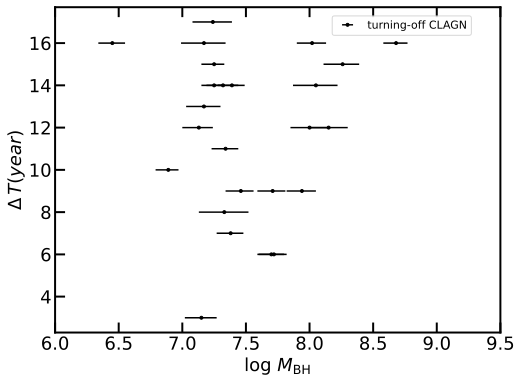

In [205]:
#save_lc_img_dir=os.getcwd()
save_lc_img_dir='/home/brettlv/Downloads/arxiv_source_code/A Systematic Analysis of Stellar Populations in the Host Galaxies of Changing-look AGNs2112.07284'
if not os.path.exists(save_lc_img_dir):
    os.mkdir(save_lc_img_dir)
    
#search_name=name_test.replace(' ','') 
#save_name=search_name.strip()
save_lc_img_path=os.path.join(save_lc_img_dir,'time_Mbh.png')  
    

#for index,name_test in enumerate(namelist) :
    #print(name_test)
fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111) 

      
ax.errorbar(x=turnoffCLAGN['mass'],
                    y=turnoffCLAGN['time'],
                    xerr=[turnoffCLAGN['mass_upper'],turnoffCLAGN['mass_lower']],
                    fmt='.',
                    color='black',label='turning-off CLAGN')
        
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', )
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in',)

'''bottom, top = ax.set_ylim() 
if bottom< top:
    ax.set_ylim(top,bottom)
'''  
ax.set_xlim(6,9.5)

#ax.set_xlabel('mjd')
ax.set_xlabel(r'log $M_\mathrm{BH}$')
ax.set_ylabel(r'$\Delta\,T(year)$')

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl=handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.61, 0.99),
      loc=2, numpoints=1,ncol=1,fontsize=11.)  

plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()    

In [112]:
for i,j in zip(turnoffCLAGN[turnoffCLAGN.columns[-3]],turnoffCLAGN[turnoffCLAGN.columns[-2]]):
    if i!='  -- ':
        mass_string=i.split('$')[1]
        print(mass_string)

 7.70^{+ 0.11}_{- 0.10} 
 7.71^{+ 0.12}_{- 0.10} 
 7.13^{+ 0.13}_{- 0.11} 
 8.05^{+ 0.18}_{- 0.17} 
 7.32^{+ 0.13}_{- 0.12} 
 7.33^{+ 0.20}_{- 0.19} 
 8.15^{+ 0.16}_{- 0.15} 
 7.72^{+ 0.12}_{- 0.10} 
 8.02^{+ 0.12}_{- 0.11} 
 7.25^{+ 0.10}_{- 0.08} 
 7.17^{+ 0.14}_{- 0.13} 
 7.24^{+ 0.16}_{- 0.15} 
 8.68^{+ 0.10}_{- 0.09} 
 8.26^{+ 0.15}_{- 0.13} 
 7.39^{+ 0.11}_{- 0.10} 
 7.17^{+ 0.18}_{- 0.17} 
 7.15^{+ 0.13}_{- 0.12} 
 7.46^{+ 0.12}_{- 0.10} 
 6.45^{+ 0.11}_{- 0.10} 
 7.38^{+ 0.11}_{- 0.10} 
 7.34^{+ 0.11}_{- 0.10} 
 7.25^{+ 0.10}_{- 0.08} 
 7.94^{+ 0.12}_{- 0.11} 
 8.00^{+ 0.15}_{- 0.14} 
 6.89^{+ 0.10}_{- 0.08} 


In [118]:
for i,j in zip(turnoffCLAGN[turnoffCLAGN.columns[-3]],turnoffCLAGN[turnoffCLAGN.columns[-2]]):
    if i!='  -- ':
        mass_string=i.split('$')[1]
        #print(mass_string)
        mass=float(mass_string.split('^')[0])
        mass_upper=float(mass_string.split('^{+')[1].split('}_{-')[0])
        mass_lower=float(mass_string.split('_{-')[1].split('}')[0])
        print(mass,mass_upper,mass_lower,j)

7.7 0.11 0.1 6.0
7.71 0.12 0.1 9.0
7.13 0.13 0.11 12.0
8.05 0.18 0.17 14.0
7.32 0.13 0.12 14.0
7.33 0.2 0.19 8.0
8.15 0.16 0.15 12.0
7.72 0.12 0.1 6.0
8.02 0.12 0.11 16.0
7.25 0.1 0.08 14.0
7.17 0.14 0.13 13.0
7.24 0.16 0.15 17.0
8.68 0.1 0.09 16.0
8.26 0.15 0.13 15.0
7.39 0.11 0.1 14.0
7.17 0.18 0.17 16.0
7.15 0.13 0.12 3.0
7.46 0.12 0.1 9.0
6.45 0.11 0.1 16.0
7.38 0.11 0.1 7.0
7.34 0.11 0.1 11.0
7.25 0.1 0.08 15.0
7.94 0.12 0.11 9.0
8.0 0.15 0.14 12.0
6.89 0.1 0.08 10.0
